Вариант 21

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm

In [25]:
data = pd.read_excel("./data8/Volgmed_2013.xlsx", header=1)[['Пол', 'Курс', 'Сила левой руки, кг', 'Сила правой руки, кг']]
data = data.dropna()
data = data.loc[((data['Пол'] == 'жен') | (data['Пол'] == 'жен.'))& (data['Курс'] == 1)]
data = data[pd.to_numeric(data['Сила левой руки, кг'], errors='coerce').notnull()]
data = data[pd.to_numeric(data['Сила правой руки, кг'], errors='coerce').notnull()]
data

,Пол,Курс,"Сила левой руки, кг","Сила правой руки, кг"
0,жен,1.0,34.0,32.0
8,жен,1.0,18.0,18.0
11,жен,1.0,28.0,32.0
14,жен,1.0,22.0,24.0
17,жен,1.0,16.0,20.0
...,...,...,...,...
3949,жен,1.0,24.0,21.0
3953,жен,1.0,19.0,20.0
3955,жен,1.0,23.0,19.0
3957,жен,1.0,15.0,18.0


In [26]:
left_arr = data['Сила левой руки, кг'].to_numpy()
q_025 = np.quantile(left_arr, 0.25)
q_075 = np.quantile(left_arr, 0.75)
iqd = q_075-q_025
upper_threshold = q_075+1.5*iqd
lower_threshold = q_025-1.5*iqd

data =  data.loc[ (data['Сила левой руки, кг'] <= upper_threshold) & (data['Сила левой руки, кг'] >= lower_threshold)]

In [27]:
right_arr = data['Сила правой руки, кг'].to_numpy()
q_025 = np.quantile(right_arr, 0.25)
q_075 = np.quantile(right_arr, 0.75)
iqd = q_075-q_025
upper_threshold = q_075+1.5*iqd
lower_threshold = q_025-1.5*iqd

data =  data.loc[ (data['Сила правой руки, кг'] <= upper_threshold) & (data['Сила правой руки, кг'] >= lower_threshold)]

Найти коэффициенты простой линейной регрессии с их пи-значениями и коэффициент детерминации.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1388.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          1.91e-171
Time:                        17:23:15   Log-Likelihood:                -2110.8
No. Observations:                 737   AIC:                             4226.
Df Residuals:                     735   BIC:                             4235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4890      0.540      4.613      0.0

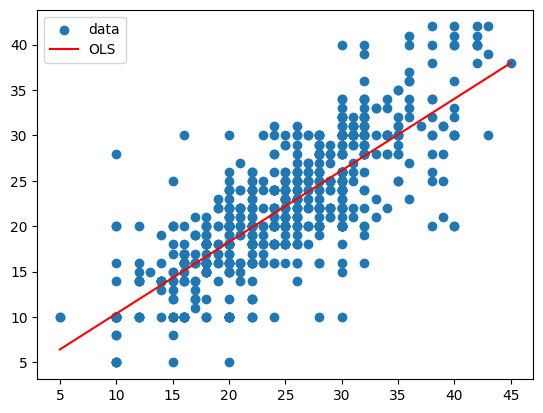

Коэффициент детерминации 0.6537623092130711
Коэффициенты с их оценкой пи-значений:
Константа: 2.4889855040610356 (p-значение: 4.683192599763964e-06)
Рост: 0.7887847826586721 (p-значение: 1.908526131974702e-171)


In [28]:
data_sort_right = data.sort_values(by='Сила правой руки, кг')
left = data_sort_right['Сила левой руки, кг'].to_numpy(dtype=float)
right = data_sort_right['Сила правой руки, кг'].to_numpy(dtype=float)
X1 = sm.add_constant(right)
model = sm.OLS(left, X1)
res = model.fit()
print(res.summary())
plt.scatter(right, left, label='data')
plt.plot(right, res.fittedvalues, label='OLS', color='red')
plt.legend()
plt.show()
print('Коэффициент детерминации', res.rsquared)
print('Коэффициенты с их оценкой пи-значений:')
names = ['Константа', 'Рост']
for i in range(len(res.params)):
    print(f"{names[i]}: {res.params[i]} (p-значение: {res.pvalues[i]})")


Оценить пи-значение для этой модели на основании 20 000 стохастических моделирований.

In [29]:
simple_regr_res=left-res.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)
print('J_n =',J)
print('upper_p_value =',p_value)

n_iter=20000
n=len(right)
counter=0
for i in range(n_iter):
  Y_temp=stats.norm.rvs(0,1,n)*sigma+right
  res=sm.OLS(Y_temp, X1).fit()
  simple_regr_res=Y_temp-res.fittedvalues
  sum_regr_res=np.cumsum(simple_regr_res)
  emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
  J_temp=np.max(np.abs(emp_bridge))
  if J_temp>J:
    counter+=1
print('Эмпирическое пи-значение =',counter/n_iter)

J_n = 0.6790928165562166
upper_p_value = 0.7456984767262897
Эмпирическое пи-значение = 0.3887
